In [1]:
import pandas as pd
import numpy as np

In [ ]:
with open(r"D:\ITI\ML2\project\bank_customer_transactions.csv",'r',encoding='utf-8') as file:
  data=file.read().replace('+ACI-','"')

In [ ]:
with open("cleaned_file.csv",'w',encoding='utf-8') as file:
  file.write(data)

In [2]:
df = pd.read_csv("cleaned_file.csv")
df.head()

TransactionID CustomerID         CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994+AC0-01+AC0-10          F   JAMSHEDPUR   
1            T2   C2142763  2057+AC0-04+AC0-04          M      JHAJJAR   
2            T3   C4417068  1996+AC0-11+AC0-26          F       MUMBAI   
3            T4   C5342380  2073+AC0-09+AC0-14          F       MUMBAI   
4            T5   C9031234  1988+AC0-03+AC0-24          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/16           142714   
4             6714.43          2/8/16           181156   

   TransactionAmount (INR)                  OwnedProducts  
0                     25.0    credit card, loans, savings  
1                  27999.0                            tds  
2                    459.0                 loans, savings  
3                   2060.0  long term investment, savings  
4                   1762.5                 loans, savings

In [3]:
# Clean the 'CustomerDOB' column by replacing '+AC0-' with '-'
df['CustomerDOB'] = df['CustomerDOB'].replace(r'\+AC0-', '-', regex=True)

# Convert the 'CustomerDOB' to a datetime format
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], format='%Y-%m-%d')

In [6]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='mixed', dayfirst=True, errors='coerce')

In [7]:
df.head()

TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-01-10          F   JAMSHEDPUR   
1            T2   C2142763  2057-04-04          M      JHAJJAR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  2073-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05      2016-08-02           143207   
1             2270.69      2016-08-02           141858   
2            17874.44      2016-08-02           142712   
3           866503.21      2016-08-02           142714   
4             6714.43      2016-08-02           181156   

   TransactionAmount (INR)                  OwnedProducts  
0                     25.0    credit card, loans, savings  
1                  27999.0                            tds  
2                    459.0                 loans, savings  
3                   2060.0  long term investment, savings  
4                   1762.5                 loans, savings

In [8]:
df['TransactionYear'] = df['TransactionDate'].dt.year

In [9]:
df['TransactionYear'].unique()

array([2016])

In [10]:
from datetime import datetime
import pandas as pd

def fix_dob(row):
    dob = row['CustomerDOB']
    tx_date = row['TransactionDate']
    
    if dob > tx_date:
        # If DOB is in future, subtract 100 years until it makes sense
        while dob > tx_date:
            dob -= pd.DateOffset(years=100)
    elif (tx_date.year - dob.year) > 100:
        # If DOB is more than 100 years older than transaction, bring forward
        while (tx_date.year - dob.year) > 100:
            dob += pd.DateOffset(years=100)
    
    return dob

# Apply the correction
df['CustomerDOB'] = df.apply(fix_dob, axis=1)

# Create a new column for birth year
df['CustomerYear'] = df['CustomerDOB'].dt.year

In [14]:
df['CustomerYear'].unique()

array([1994., 1957., 1996., 1973., 1988., 1972., 1992., 1982., 1984.,
       1978., 1968., 2000., 1989., 1991., 1985., 1993., 1986., 1967.,
       1979., 1977., 1997., 1983., 1990., 1980., 1981., 1966., 1987.,
       1975., 1995., 1974., 1971., 1932., 1959.,   nan, 1999., 1965.,
       1941., 1954., 1970., 1976., 1921., 1969., 2004., 1943., 1998.,
       1951., 1960., 1956., 1953., 1947., 1964., 1948., 1962., 1952.,
       1955., 1961., 1936., 1963., 1942., 1944., 1938., 2002., 1949.,
       1958., 1950., 1946., 1945., 1937., 2007., 2001., 1939., 1940.,
       2013., 2003., 2005., 2010., 2011., 1933., 1934., 1927., 1919.,
       1928., 1930., 2009., 1931., 1929., 1935., 2015., 2016., 2006.,
       2008., 2012., 1923., 1926., 1924., 1922., 2014., 1920., 1925.,
       1918.])

In [15]:
df.isna().sum()

TransactionID                  0
CustomerID                     0
CustomerDOB                 3397
CustGender                  1100
CustLocation                 151
CustAccountBalance          2369
TransactionDate                0
TransactionTime                0
TransactionAmount (INR)        0
OwnedProducts              20480
TransactionYear                0
CustomerYear                3397
dtype: int64

### Get Customer Age 

In [17]:
df['CustomerAge'] = df['TransactionYear'] - df['CustomerYear']
df.head()

TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-01-10          F   JAMSHEDPUR   
1            T2   C2142763  1957-04-04          M      JHAJJAR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  1973-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05      2016-08-02           143207   
1             2270.69      2016-08-02           141858   
2            17874.44      2016-08-02           142712   
3           866503.21      2016-08-02           142714   
4             6714.43      2016-08-02           181156   

   TransactionAmount (INR)                  OwnedProducts  TransactionYear  \
0                     25.0    credit card, loans, savings             2016   
1                  27999.0                            tds             2016   
2                    459.0                 loans, savings             2016   
3                   2060.0  long term investment, savings             2016   
4                   1762.5                 loans, savings             2016   

   CustomerYear  CustomerAge  
0        1994.0         22.0  
1        1957.0         59.0  
2        1996.0         20.0  
3        1973.0         43.0  
4        1988.0         28.0

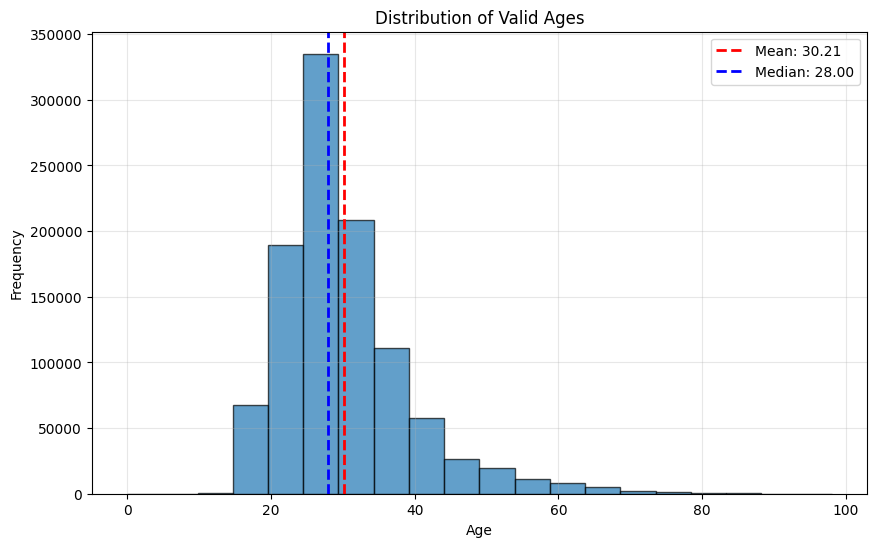

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded and has the column "Age"

# Plot the distribution of valid ages
plt.figure(figsize=(10, 6))
df["CustomerAge"].dropna().hist(bins=20, edgecolor='k', alpha=0.7)
plt.title("Distribution of Valid Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Add lines for mean and median
mean_age = df["CustomerAge"].mean()
median_age = df["CustomerAge"].median()
plt.axvline(mean_age, color='r', linestyle='dashed', linewidth=2, label=f"Mean: {mean_age:.2f}")
plt.axvline(median_age, color='b', linestyle='dashed', linewidth=2, label=f"Median: {median_age:.2f}")

# Add legend and grid
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

In [19]:
df_copy = df.copy()

In [ ]:
df = df.drop(columns=['CustomerDOB' , 'TransactionYear' , 'CustomerYear','TransactionTime'], axis=1) 

In [22]:
df.isna().sum()

TransactionID                  0
CustomerID                     0
CustGender                  1100
CustLocation                 151
CustAccountBalance          2369
TransactionDate                0
TransactionAmount (INR)        0
OwnedProducts              20480
CustomerAge                 3397
dtype: int64

In [23]:
df = df.dropna(subset=["CustGender","CustLocation","CustAccountBalance"])

In [24]:
df.isna().sum()

TransactionID                  0
CustomerID                     0
CustGender                     0
CustLocation                   0
CustAccountBalance             0
TransactionDate                0
TransactionAmount (INR)        0
OwnedProducts              18114
CustomerAge                 3333
dtype: int64

### Impute the CustomerAge and OwnedProducts

In [ ]:
df_copy2 = df.copy()

In [26]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Step 1: Convert categorical column to proper category dtype
df['OwnedProducts'] = df['OwnedProducts'].astype('category')

# Step 2: Create encoded version for imputation
cat_codes = df['OwnedProducts'].cat.codes.replace(-1, np.nan)  # -1 indicates NaN
df['Ownedencoded'] = cat_codes

df[['CustomerAge', 'Ownedencoded']] = df[['CustomerAge', 'Ownedencoded']].replace({pd.NA: np.nan})


# Step 3: Configure and run MICE imputer
imputer = IterativeImputer(
    max_iter=10,
    random_state=42,
    initial_strategy='most_frequent'
)
imputed_data = imputer.fit_transform(
    df[['CustomerAge', 'Ownedencoded']]
)

# Step 4: Post-process results
# Handle Age (continuous variable)
df['CustomerAge'] = imputed_data[:, 0]

# Handle OwnedProducts (categorical)
# Get category mapping
categories = df['OwnedProducts'].cat.categories
n_categories = len(categories)

# Process imputed codes
imputed_codes = imputed_data[:, 1]
imputed_codes = np.round(imputed_codes).clip(0, n_categories-1).astype(int)

# Map back to original categories
df['OwnedProducts'] = pd.Categorical.from_codes(
    codes=imputed_codes,
    categories=categories
)

# Step 5: Verify results
print("Missing values after imputation:")
print(df[['CustomerAge', 'OwnedProducts']].isnull().sum())

print("\nValue counts for OwnedProducts:")
print(df['OwnedProducts'].value_counts())

Missing values after imputation:
CustomerAge      0
OwnedProducts    0
dtype: int64

Value counts for OwnedProducts:
OwnedProducts
loans                                                                           243510
credit card, loans, savings                                                     222505
loans, savings                                                                  123192
credit card, savings                                                             91470
cds, credit card, long term investment, retirement plan, savings, tds            91124
savings                                                                          81120
cds, credit card, retirement plan, savings                                       67304
cds, credit card, retirement plan, savings, tds                                  27206
cds, credit card, savings                                                        19628
long term investment, savings                                                    13164

In [28]:
df = df.drop(columns=['Ownedencoded'], axis=1)

In [29]:
df.isna().sum()

TransactionID              0
CustomerID                 0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionAmount (INR)    0
OwnedProducts              0
CustomerAge                0
dtype: int64

### Deal With Gender (encoding)

In [30]:
df["CustGender"].unique()

array(['F', 'M', 'T'], dtype=object)

In [34]:
df = df[df["CustGender"] != "T"]
df["CustGender"].unique()

array(['F', 'M'], dtype=object)

In [35]:
gender_encoded = pd.get_dummies(df["CustGender"], prefix="Gender")
gender_encoded = gender_encoded.astype(int)
gender_encoded

Gender_F  Gender_M
0               1         0
1               0         1
2               1         0
3               1         0
4               1         0
...           ...       ...
1048562         0         1
1048563         0         1
1048564         0         1
1048565         0         1
1048566         0         1

[1044946 rows x 2 columns]

In [36]:
df = pd.concat([df, gender_encoded], axis=1)

In [37]:
df = df.drop(columns=['CustGender'], axis=1)
df

TransactionID CustomerID   CustLocation  CustAccountBalance  \
0                  T1   C5841053     JAMSHEDPUR            17819.05   
1                  T2   C2142763        JHAJJAR             2270.69   
2                  T3   C4417068         MUMBAI            17874.44   
3                  T4   C5342380         MUMBAI           866503.21   
4                  T5   C9031234    NAVI MUMBAI             6714.43   
...               ...        ...            ...                 ...   
1048562      T1048563   C8020229      NEW DELHI             7635.19   
1048563      T1048564   C6459278         NASHIK            27311.42   
1048564      T1048565   C6412354      HYDERABAD           221757.06   
1048565      T1048566   C6420483  VISAKHAPATNAM            10117.87   
1048566      T1048567   C8337524           PUNE            75734.42   

        TransactionDate  TransactionAmount (INR)  \
0            2016-08-02                     25.0   
1            2016-08-02                  27999.0   
2            2016-08-02                    459.0   
3            2016-08-02                   2060.0   
4            2016-08-02                   1762.5   
...                 ...                      ...   
1048562      2016-09-18                    799.0   
1048563      2016-09-18                    460.0   
1048564      2016-09-18                    770.0   
1048565      2016-09-18                   1000.0   
1048566      2016-09-18                   1166.0   

                                           OwnedProducts  CustomerAge  \
0                            credit card, loans, savings         22.0   
1                                                    tds         59.0   
2                                         loans, savings         20.0   
3                          long term investment, savings         43.0   
4                                         loans, savings         28.0   
...                                                  ...          ...   
1048562                                   loans, savings         26.0   
1048563                      credit card, loans, savings         24.0   
1048564  cds, credit card, retirement plan, savings, tds         27.0   
1048565                      credit card, loans, savings         38.0   
1048566       cds, credit card, retirement plan, savings         32.0   

         Gender_F  Gender_M  
0               1         0  
1               0         1  
2               1         0  
3               1         0  
4               1         0  
...           ...       ...  
1048562         0         1  
1048563         0         1  
1048564         0         1  
1048565         0         1  
1048566         0         1  

[1044946 rows x 10 columns]

### Deal with OwnedProducts (encoding)

In [38]:
one_hot_encoded = df["OwnedProducts"].str.get_dummies(sep=", ")
df = pd.concat([df, one_hot_encoded], axis=1)
df

TransactionID CustomerID   CustLocation  CustAccountBalance  \
0                  T1   C5841053     JAMSHEDPUR            17819.05   
1                  T2   C2142763        JHAJJAR             2270.69   
2                  T3   C4417068         MUMBAI            17874.44   
3                  T4   C5342380         MUMBAI           866503.21   
4                  T5   C9031234    NAVI MUMBAI             6714.43   
...               ...        ...            ...                 ...   
1048562      T1048563   C8020229      NEW DELHI             7635.19   
1048563      T1048564   C6459278         NASHIK            27311.42   
1048564      T1048565   C6412354      HYDERABAD           221757.06   
1048565      T1048566   C6420483  VISAKHAPATNAM            10117.87   
1048566      T1048567   C8337524           PUNE            75734.42   

        TransactionDate  TransactionAmount (INR)  \
0            2016-08-02                     25.0   
1            2016-08-02                  27999.0   
2            2016-08-02                    459.0   
3            2016-08-02                   2060.0   
4            2016-08-02                   1762.5   
...                 ...                      ...   
1048562      2016-09-18                    799.0   
1048563      2016-09-18                    460.0   
1048564      2016-09-18                    770.0   
1048565      2016-09-18                   1000.0   
1048566      2016-09-18                   1166.0   

                                           OwnedProducts  CustomerAge  \
0                            credit card, loans, savings         22.0   
1                                                    tds         59.0   
2                                         loans, savings         20.0   
3                          long term investment, savings         43.0   
4                                         loans, savings         28.0   
...                                                  ...          ...   
1048562                                   loans, savings         26.0   
1048563                      credit card, loans, savings         24.0   
1048564  cds, credit card, retirement plan, savings, tds         27.0   
1048565                      credit card, loans, savings         38.0   
1048566       cds, credit card, retirement plan, savings         32.0   

         Gender_F  Gender_M  cds  credit card  loans  long term investment  \
0               1         0    0            1      1                     0   
1               0         1    0            0      0                     0   
2               1         0    0            0      1                     0   
3               1         0    0            0      0                     1   
4               1         0    0            0      1                     0   
...           ...       ...  ...          ...    ...                   ...   
1048562         0         1    0            0      1                     0   
1048563         0         1    0            1      1                     0   
1048564         0         1    1            1      0                     0   
1048565         0         1    0            1      1                     0   
1048566         0         1    1            1      0                     0   

         retirement plan  savings  tds  
0                      0        1    0  
1                      0        0    1  
2                      0        1    0  
3                      0        1    0  
4                      0        1    0  
...                  ...      ...  ...  
1048562                0        1    0  
1048563                0        1    0  
1048564                1        1    1  
1048565                0        1    0  
1048566                1        1    0  

[1044946 rows x 17 columns]

In [44]:
pip install unidecode

   ---------------------------------------- 0.0/235.8 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/235.8 kB ? eta -:--:--
   ---------- ---------------------------- 61.4/235.8 kB 812.7 kB/s eta 0:00:01
   --------------- ------------------------ 92.2/235.8 kB 1.1 MB/s eta 0:00:01
   --------------- ------------------------ 92.2/235.8 kB 1.1 MB/s eta 0:00:01
   --------------- ------------------------ 92.2/235.8 kB 1.1 MB/s eta 0:00:01
   --------------- ------------------------ 92.2/235.8 kB 1.1 MB/s eta 0:00:01
   ------------------ ------------------- 112.6/235.8 kB 409.6 kB/s eta 0:00:01
   ---------------------------- --------- 174.1/235.8 kB 476.3 kB/s eta 0:00:01
   -------------------------------------- 235.8/235.8 kB 601.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
df["CustLocation_as_title"] = df["CustLocation"].str.strip().str.title()  

In [49]:
from rapidfuzz import process, fuzz
import geonamescache
from unidecode import unidecode

def validate_indian_cities(df, location_col):
    gc = geonamescache.GeonamesCache()
    all_cities = gc.get_cities()
    
    # Get Indian cities with normalized names
    indian_cities = {
        unidecode(city['name'].lower()): city['name']  # Store original proper case
        for city in all_cities.values() 
        if city['countrycode'] == 'IN'
    }
    city_names = list(indian_cities.keys())  # Lowercase names for matching

    validated = []
    suggested = []

    for loc in df[location_col]:
        # Normalize the input
        normalized_loc = unidecode(str(loc).lower())
        
        # First try exact match with normalized names
        if normalized_loc in indian_cities:
            validated.append(True)
            suggested.append(indian_cities[normalized_loc])  # Return proper case
        else:
            # Try fuzzy matching with relaxed threshold
            match = process.extractOne(
                normalized_loc, 
                city_names, 
                scorer=fuzz.ratio, 
                score_cutoff=50  # Lower threshold
            )
            
            if match:
                validated.append(False)
                suggested.append(indian_cities[match[0]])  # Return proper case
            else:
                validated.append(False)
                suggested.append("No close match")

    df['Is_Valid_City'] = validated
    df['Suggested_City'] = suggested

    return df

In [50]:
validated_df = validate_indian_cities(df, 'CustLocation_as_title')

In [51]:
validated_df

TransactionID CustomerID   CustLocation  CustAccountBalance  \
0                  T1   C5841053     JAMSHEDPUR            17819.05   
1                  T2   C2142763        JHAJJAR             2270.69   
2                  T3   C4417068         MUMBAI            17874.44   
3                  T4   C5342380         MUMBAI           866503.21   
4                  T5   C9031234    NAVI MUMBAI             6714.43   
...               ...        ...            ...                 ...   
1048562      T1048563   C8020229      NEW DELHI             7635.19   
1048563      T1048564   C6459278         NASHIK            27311.42   
1048564      T1048565   C6412354      HYDERABAD           221757.06   
1048565      T1048566   C6420483  VISAKHAPATNAM            10117.87   
1048566      T1048567   C8337524           PUNE            75734.42   

        TransactionDate  TransactionAmount (INR)  \
0            2016-08-02                     25.0   
1            2016-08-02                  27999.0   
2            2016-08-02                    459.0   
3            2016-08-02                   2060.0   
4            2016-08-02                   1762.5   
...                 ...                      ...   
1048562      2016-09-18                    799.0   
1048563      2016-09-18                    460.0   
1048564      2016-09-18                    770.0   
1048565      2016-09-18                   1000.0   
1048566      2016-09-18                   1166.0   

                                           OwnedProducts  CustomerAge  \
0                            credit card, loans, savings         22.0   
1                                                    tds         59.0   
2                                         loans, savings         20.0   
3                          long term investment, savings         43.0   
4                                         loans, savings         28.0   
...                                                  ...          ...   
1048562                                   loans, savings         26.0   
1048563                      credit card, loans, savings         24.0   
1048564  cds, credit card, retirement plan, savings, tds         27.0   
1048565                      credit card, loans, savings         38.0   
1048566       cds, credit card, retirement plan, savings         32.0   

         Gender_F  Gender_M  cds  credit card  loans  long term investment  \
0               1         0    0            1      1                     0   
1               0         1    0            0      0                     0   
2               1         0    0            0      1                     0   
3               1         0    0            0      0                     1   
4               1         0    0            0      1                     0   
...           ...       ...  ...          ...    ...                   ...   
1048562         0         1    0            0      1                     0   
1048563         0         1    0            1      1                     0   
1048564         0         1    1            1      0                     0   
1048565         0         1    0            1      1                     0   
1048566         0         1    1            1      0                     0   

         retirement plan  savings  tds  Is_Valid_City Suggested_City  \
0                      0        1    0           True     Jamshedpur   
1                      0        0    1           True        Jhajjar   
2                      0        1    0           True         Mumbai   
3                      0        1    0           True         Mumbai   
4                      0        1    0           True    Navi Mumbai   
...                  ...      ...  ...            ...            ...   
1048562                0        1    0           True      New Delhi   
1048563                0        1    0           True         Nashik   
1048564                1        1    1           True      Hyderābād

In [59]:
validated_df[["Suggested_City","CustLocation_as_title"]].head(50)

Suggested_City     CustLocation_as_title
0      Jamshedpur                Jamshedpur
1         Jhajjar                   Jhajjar
2          Mumbai                    Mumbai
3          Mumbai                    Mumbai
4     Navi Mumbai               Navi Mumbai
5        Itānagar                  Itanagar
6          Mumbai                    Mumbai
7          Mumbai                    Mumbai
8         Gurgaon                   Gurgaon
9          Mumbai                    Mumbai
10         Mohali                    Mohali
11         Guntur                    Guntur
12      Ahmedabad                 Ahmedabad
13          Thāne                     Thane
14           Pune                      Pune
15      New Delhi                 New Delhi
16         Mumbai                    Mumbai
17         Mumbai                    Mumbai
18         Mumbai                    Mumbai
19           Pune                      Pune
20      Nabīnagar   No 3 Kalyani Nagar Pune
21   Secunderabad              Secunderabad
22      Ahmedabad  Ways Panchkuva Ahmedabad
23        Lucknow                   Lucknow
24        Gurgaon                   Gurgaon
25        Gurgaon                   Gurgaon
26          Delhi                     Delhi
27        Chennai                   Chennai
28         Mohali                    Mohali
30      New Delhi                 New Delhi
31      Ghāziābād                 Ghaziabad
32      Mangalore                 Bangalore
33         Mumbai                    Mumbai
34        Gurgaon                   Gurgaon
35      Ahmedabad                 Ahmedabad
36        Chennai                   Chennai
37       Guwahati                  Guwahati
38        Dhanbad                   Dhanbad
39        Muktsar                   Muktsar
40           Soro                   Socorro
41    Navi Mumbai     Andheri (East) Mumbai
42     Aurangābād                Aurangabad
43         Mumbai                    Mumbai
44           Kotā                      Kota
45        Chennai                   Chennai
46         Jaipur                    Jaipur
47     Sangāreddi            K V Rangareddy
48  Muzaffarnagar             Muzaffarnagar
49         Budaun                   Burdwan
50        Gurgaon                   Gurgaon

In [55]:
validated_df["Is_Valid_City"].value_counts()

Is_Valid_City
True     809189
False    235757
Name: count, dtype: int64

In [54]:
validated_df["Suggested_City"].nunique()

1911

In [61]:
final_df = validated_df.drop(columns=['CustLocation_as_title','Is_Valid_City','OwnedProducts'], axis=1).copy()

In [63]:
final_df = final_df.rename(columns={'Suggested_City': 'CustLocation'})

In [64]:
final_df

TransactionID CustomerID   CustLocation  CustAccountBalance  \
0                  T1   C5841053     JAMSHEDPUR            17819.05   
1                  T2   C2142763        JHAJJAR             2270.69   
2                  T3   C4417068         MUMBAI            17874.44   
3                  T4   C5342380         MUMBAI           866503.21   
4                  T5   C9031234    NAVI MUMBAI             6714.43   
...               ...        ...            ...                 ...   
1048562      T1048563   C8020229      NEW DELHI             7635.19   
1048563      T1048564   C6459278         NASHIK            27311.42   
1048564      T1048565   C6412354      HYDERABAD           221757.06   
1048565      T1048566   C6420483  VISAKHAPATNAM            10117.87   
1048566      T1048567   C8337524           PUNE            75734.42   

        TransactionDate  TransactionAmount (INR)  CustomerAge  Gender_F  \
0            2016-08-02                     25.0         22.0         1   
1            2016-08-02                  27999.0         59.0         0   
2            2016-08-02                    459.0         20.0         1   
3            2016-08-02                   2060.0         43.0         1   
4            2016-08-02                   1762.5         28.0         1   
...                 ...                      ...          ...       ...   
1048562      2016-09-18                    799.0         26.0         0   
1048563      2016-09-18                    460.0         24.0         0   
1048564      2016-09-18                    770.0         27.0         0   
1048565      2016-09-18                   1000.0         38.0         0   
1048566      2016-09-18                   1166.0         32.0         0   

         Gender_M  cds  credit card  loans  long term investment  \
0               0    0            1      1                     0   
1               1    0            0      0                     0   
2               0    0            0      1                     0   
3               0    0            0      0                     1   
4               0    0            0      1                     0   
...           ...  ...          ...    ...                   ...   
1048562         1    0            0      1                     0   
1048563         1    0            1      1                     0   
1048564         1    1            1      0                     0   
1048565         1    0            1      1                     0   
1048566         1    1            1      0                     0   

         retirement plan  savings  tds   CustLocation  
0                      0        1    0     Jamshedpur  
1                      0        0    1        Jhajjar  
2                      0        1    0         Mumbai  
3                      0        1    0         Mumbai  
4                      0        1    0    Navi Mumbai  
...                  ...      ...  ...            ...  
1048562                0        1    0      New Delhi  
1048563                0        1    0         Nashik  
1048564                1        1    1      Hyderābād  
1048565                0        1    0  Visakhapatnam  
1048566                1        1    0           Pune  

[1044946 rows x 17 columns]

In [66]:
final_df_copy = final_df.copy()

In [67]:
final_df = final_df.drop(columns=['TransactionDate','TransactionAmount (INR)'], axis=1)

In [74]:
final_df

TransactionID CustomerID   CustLocation  CustAccountBalance  \
0                  T1   C5841053     JAMSHEDPUR            17819.05   
1                  T2   C2142763        JHAJJAR             2270.69   
2                  T3   C4417068         MUMBAI            17874.44   
3                  T4   C5342380         MUMBAI           866503.21   
4                  T5   C9031234    NAVI MUMBAI             6714.43   
...               ...        ...            ...                 ...   
1048562      T1048563   C8020229      NEW DELHI             7635.19   
1048563      T1048564   C6459278         NASHIK            27311.42   
1048564      T1048565   C6412354      HYDERABAD           221757.06   
1048565      T1048566   C6420483  VISAKHAPATNAM            10117.87   
1048566      T1048567   C8337524           PUNE            75734.42   

         CustomerAge  Gender_F  Gender_M  cds  credit card  loans  \
0               22.0         1         0    0            1      1   
1               59.0         0         1    0            0      0   
2               20.0         1         0    0            0      1   
3               43.0         1         0    0            0      0   
4               28.0         1         0    0            0      1   
...              ...       ...       ...  ...          ...    ...   
1048562         26.0         0         1    0            0      1   
1048563         24.0         0         1    0            1      1   
1048564         27.0         0         1    1            1      0   
1048565         38.0         0         1    0            1      1   
1048566         32.0         0         1    1            1      0   

         long term investment  retirement plan  savings  tds   CustLocation  
0                           0                0        1    0     Jamshedpur  
1                           0                0        0    1        Jhajjar  
2                           0                0        1    0         Mumbai  
3                           1                0        1    0         Mumbai  
4                           0                0        1    0    Navi Mumbai  
...                       ...              ...      ...  ...            ...  
1048562                     0                0        1    0      New Delhi  
1048563                     0                0        1    0         Nashik  
1048564                     0                1        1    1      Hyderābād  
1048565                     0                0        1    0  Visakhapatnam  
1048566                     0                1        1    0           Pune  

[1044946 rows x 15 columns]

In [73]:
final_df.columns

Index(['TransactionID', 'CustomerID', 'CustLocation', 'CustAccountBalance',
       'CustomerAge', 'Gender_F', 'Gender_M', 'cds', 'credit card', 'loans',
       'long term investment', 'retirement plan', 'savings', 'tds',
       'CustLocation'],
      dtype='object')

In [75]:
final_df.to_csv("final_cleaned_data.csv", index=False, encoding='utf-8-sig')

In [1]:
import pandas as pd 
import numpy as np
final_df = pd.read_csv("final_cleaned_data.csv")
final_df.head()

TransactionID CustomerID CustLocation  CustAccountBalance  CustomerAge  \
0            T1   C5841053   JAMSHEDPUR            17819.05         22.0   
1            T2   C2142763      JHAJJAR             2270.69         59.0   
2            T3   C4417068       MUMBAI            17874.44         20.0   
3            T4   C5342380       MUMBAI           866503.21         43.0   
4            T5   C9031234  NAVI MUMBAI             6714.43         28.0   

   Gender_F  Gender_M  cds  credit card  loans  long term investment  \
0         1         0    0            1      1                     0   
1         0         1    0            0      0                     0   
2         1         0    0            0      1                     0   
3         1         0    0            0      0                     1   
4         1         0    0            0      1                     0   

   retirement plan  savings  tds CustLocation.1  
0                0        1    0     Jamshedpur  
1                0        0    1        Jhajjar  
2                0        1    0         Mumbai  
3                0        1    0         Mumbai  
4                0        1    0    Navi Mumbai

In [2]:
final_df = final_df.drop(columns=['CustLocation'], axis=1)

In [3]:
final_df.rename(columns={"CustLocation.1": "CustLocation"}, inplace=True)

In [4]:
final_df.head()

TransactionID CustomerID  CustAccountBalance  CustomerAge  Gender_F  \
0            T1   C5841053            17819.05         22.0         1   
1            T2   C2142763             2270.69         59.0         0   
2            T3   C4417068            17874.44         20.0         1   
3            T4   C5342380           866503.21         43.0         1   
4            T5   C9031234             6714.43         28.0         1   

   Gender_M  cds  credit card  loans  long term investment  retirement plan  \
0         0    0            1      1                     0                0   
1         1    0            0      0                     0                0   
2         0    0            0      1                     0                0   
3         0    0            0      0                     1                0   
4         0    0            0      1                     0                0   

   savings  tds CustLocation  
0        1    0   Jamshedpur  
1        0    1      Jhajjar  
2        1    0       Mumbai  
3        1    0       Mumbai  
4        1    0  Navi Mumbai

In [5]:
final_df = final_df.groupby("CustomerID").agg({
                                        "TransactionID" : "count",
                                        "CustLocation":"first",
                                        "CustAccountBalance"  : "mean",
                                        "Gender_F" : "first",
                                        "Gender_M" : "first",
                                        "cds" : "first",
                                        "credit card" : "first",
                                        "loans" : "first",
                                        "long term investment" : "first",
                                        "retirement plan" : "first",
                                        "savings" : "first",
                                        "tds" : "first",
                                        "CustomerAge" : "median",
                        })

final_df = final_df.reset_index()
final_df.head()

CustomerID  TransactionID CustLocation  CustAccountBalance  Gender_F  \
0   C1010011              2        Noida           76340.635         1   
1   C1010012              1       Mumbai           24204.490         0   
2   C1010014              2       Mumbai          100112.950         1   
3   C1010018              1       Chāpra             496.180         1   
4   C1010024              1      Kolkata           87058.650         0   

   Gender_M  cds  credit card  loans  long term investment  retirement plan  \
0         0    0            1      0                     0                0   
1         1    0            1      1                     0                0   
2         0    0            1      0                     0                0   
3         0    0            0      1                     0                0   
4         1    0            0      0                     0                0   

   savings  tds  CustomerAge  
0        1    0         28.5  
1        1    0         22.0  
2        1    0         28.0  
3        0    0         26.0  
4        1    0         51.0

In [6]:
final_df.rename(columns={"TransactionID": "Num_Transactions"}, inplace=True)

In [7]:
final_df.drop(columns=["CustomerID"],inplace=True)

In [8]:
final_df["Num_Transactions"].value_counts()

Num_Transactions
1    738913
2    124288
3     16635
4      1687
5       144
6        14
Name: count, dtype: int64

### After finish cleaning data we Will visualize and analysis the clean data

### 📊 1. Distribution of Number of Transactions

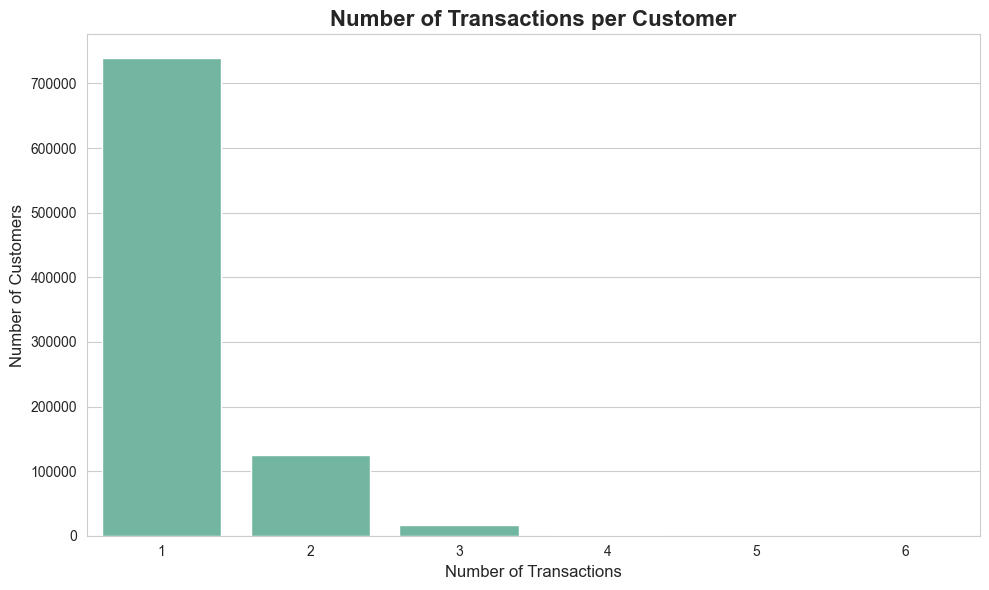

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a colorful style and palette
sns.set_style("whitegrid")
sns.set_palette("Set2")  # Try 'Set1', 'Set2', 'pastel', or 'tab10'

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(
    x="Num_Transactions",
    data=final_df,
    order=sorted(final_df["Num_Transactions"].value_counts().index)
)

# Add titles and labels
plt.title("Number of Transactions per Customer", fontsize=16, weight='bold')
plt.xlabel("Number of Transactions", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

# Rotate x-axis ticks if needed
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 📈 2. Average Account Balance vs. Number of Transactions

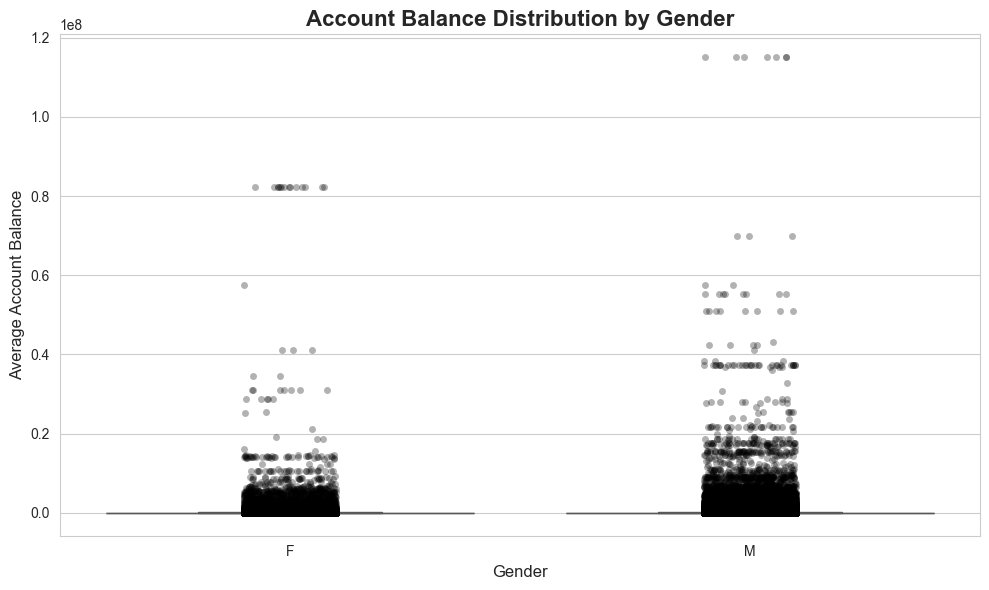

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'Gender_F' and 'Gender_M' are binary, you need to convert to a single 'Gender' column first:
final_df['Gender'] = final_df.apply(lambda row: 'F' if row['Gender_F'] == 1 else 'M', axis=1)

# Plot with color and style
plt.figure(figsize=(10, 6))
sns.set_palette("Set2")
sns.boxplot(x='Gender', y='CustAccountBalance', data=final_df, showfliers=False)
sns.stripplot(x='Gender', y='CustAccountBalance', data=final_df, color='black', alpha=0.3, jitter=True)

plt.title("Account Balance Distribution by Gender", fontsize=16, weight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Average Account Balance", fontsize=12)
plt.tight_layout()
plt.show()



In [29]:
final_df = final_df.drop(columns=['Gender'], axis=1)

### 📈 3. Average Account Balance vs. Number of Transactions

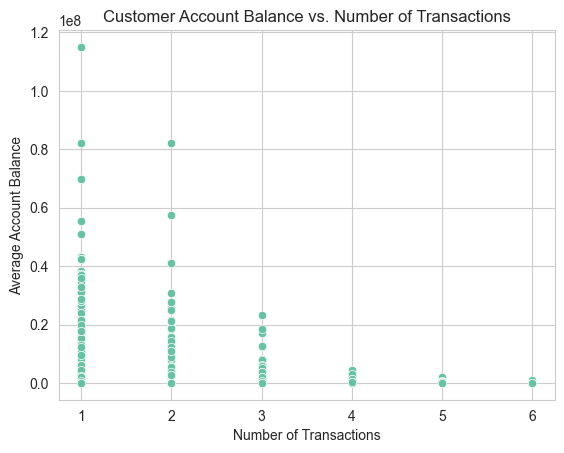

In [13]:
sns.scatterplot(x="Num_Transactions", y="CustAccountBalance", data=final_df)
plt.title("Customer Account Balance vs. Number of Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Average Account Balance")
plt.show()


### 🧓 4. Customer Age Distribution

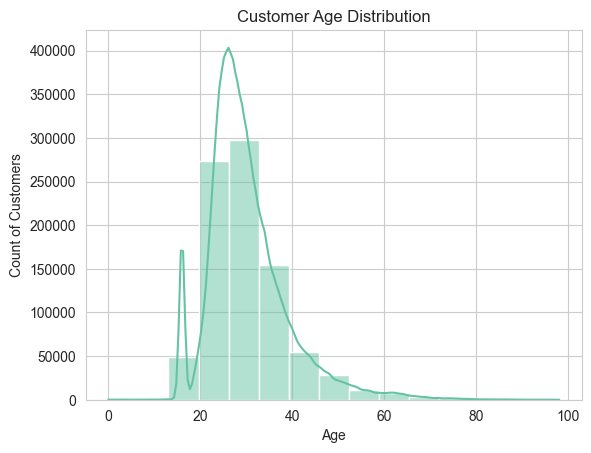

In [14]:
sns.histplot(final_df["CustomerAge"], bins=15, kde=True)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count of Customers")
plt.show()

### 📦 5. Countplot of Financial Products Ownership

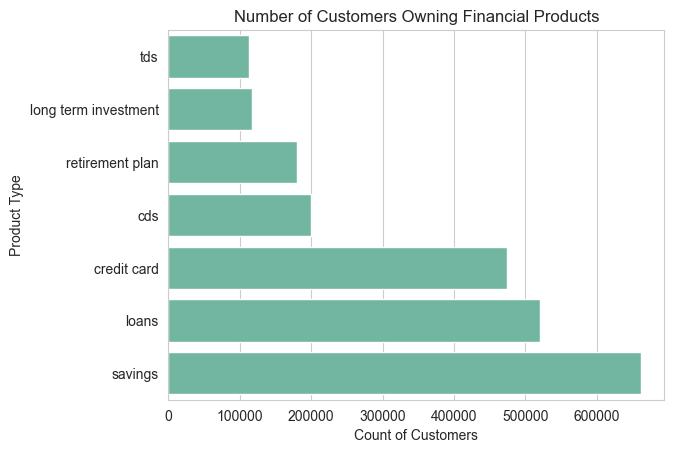

In [19]:
product_columns = ["cds", "credit card", "loans", "long term investment", 
                   "retirement plan", "savings", "tds"]

product_counts = final_df[product_columns].sum().sort_values()

sns.barplot(x=product_counts.values, y=product_counts.index)
plt.title("Number of Customers Owning Financial Products")
plt.xlabel("Count of Customers")
plt.ylabel("Product Type")
plt.show()


### 🧭 6. Top Customer Locations by Count

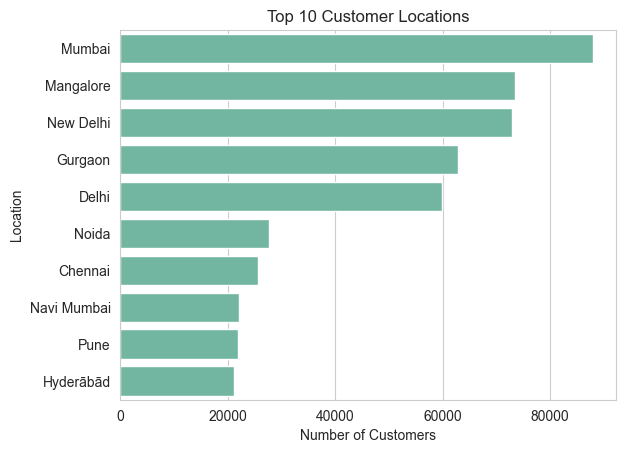

In [20]:
top_locations = final_df["CustLocation"].value_counts().head(10)

sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title("Top 10 Customer Locations")
plt.xlabel("Number of Customers")
plt.ylabel("Location")
plt.show()


### 7. Heatmap for correlation discover

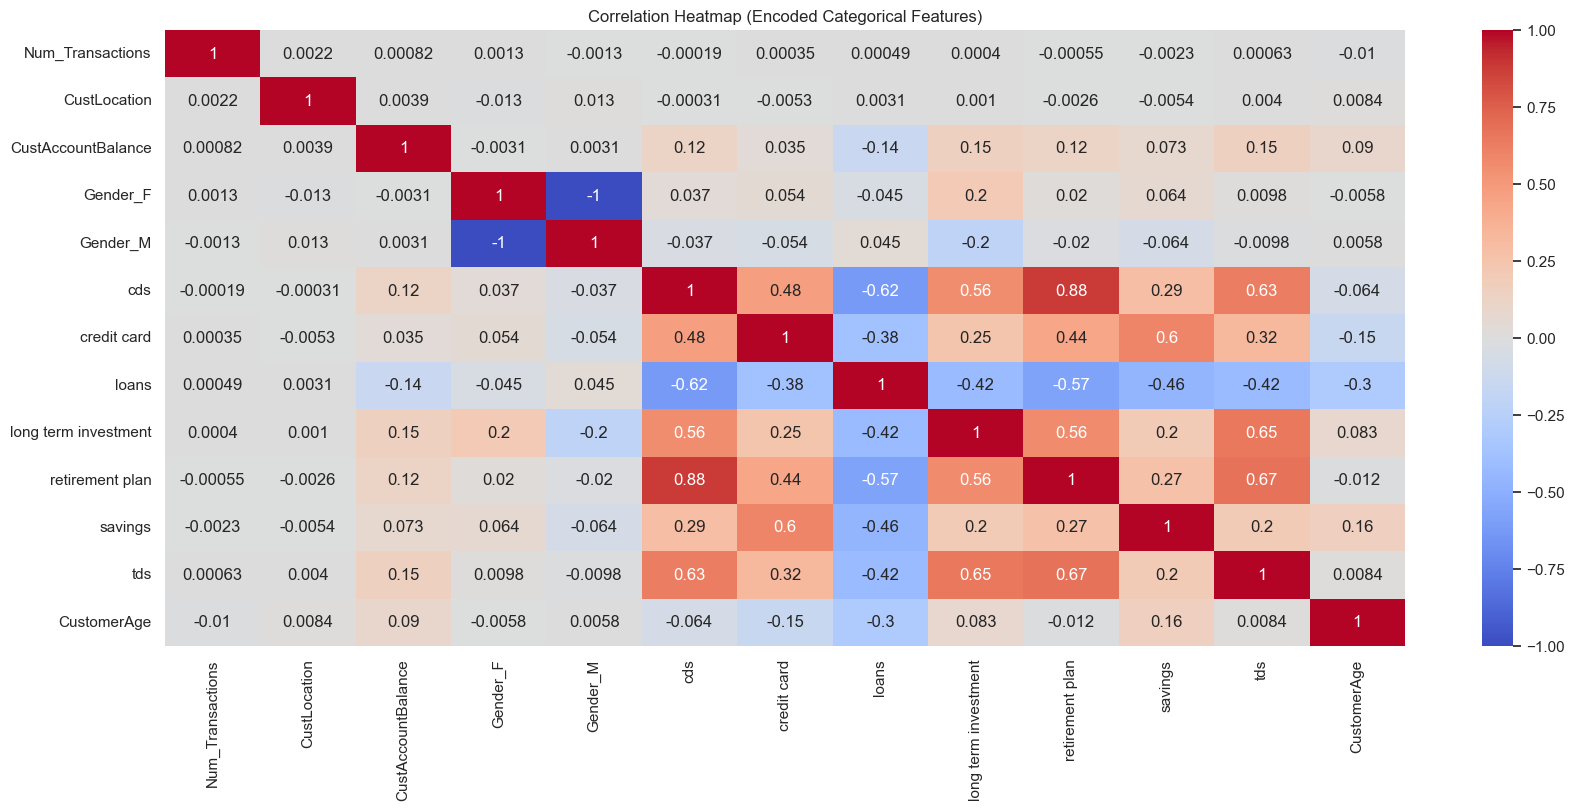

In [31]:
# Create a copy to preserve original data
df_encoded = final_df.copy()

# Convert location to numeric codes (simple approach)
df_encoded['CustLocation'] = df_encoded['CustLocation'].astype('category').cat.codes

# Now calculate correlation
plt.figure(figsize=(20,8))
corr = df_encoded.corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True)
plt.title('Correlation Heatmap (Encoded Categorical Features)')
plt.show()

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Separate features and scale them
features = final_df.drop(columns=['CustLocation'])  # Drop non-numeric column
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 2. Apply T-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(scaled_features)

# 3. Create visualization dataframe
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['CustLocation'] = final_df['CustLocation'].values  # Add back location for coloring

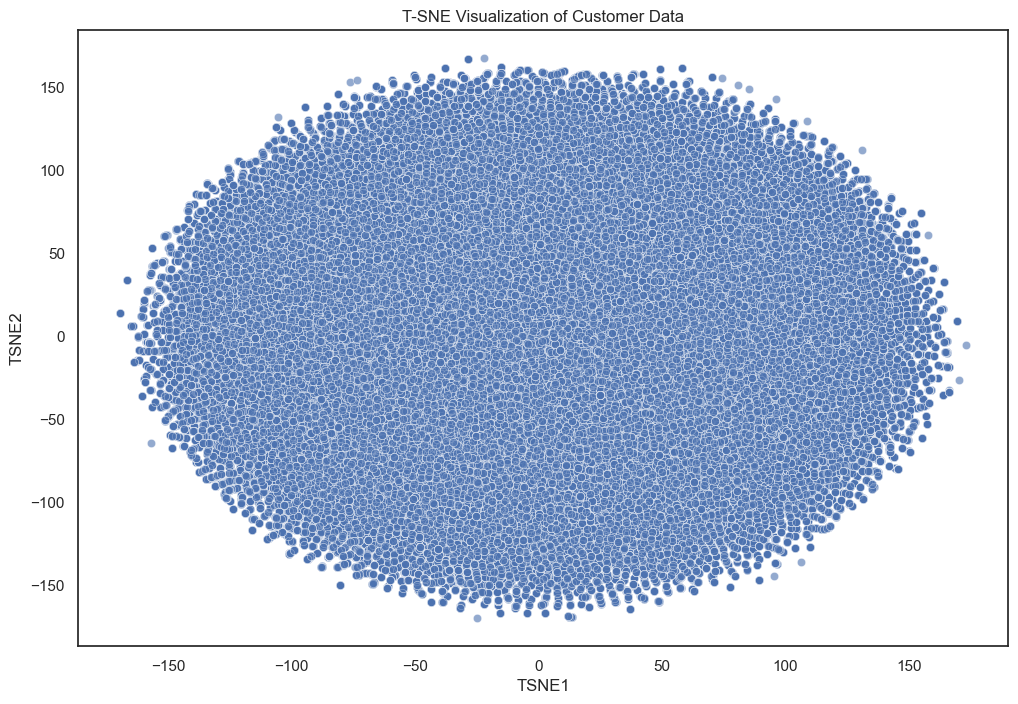

In [33]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', data=tsne_df, alpha=0.6)
plt.title('T-SNE Visualization of Customer Data')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11788\4082638839.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


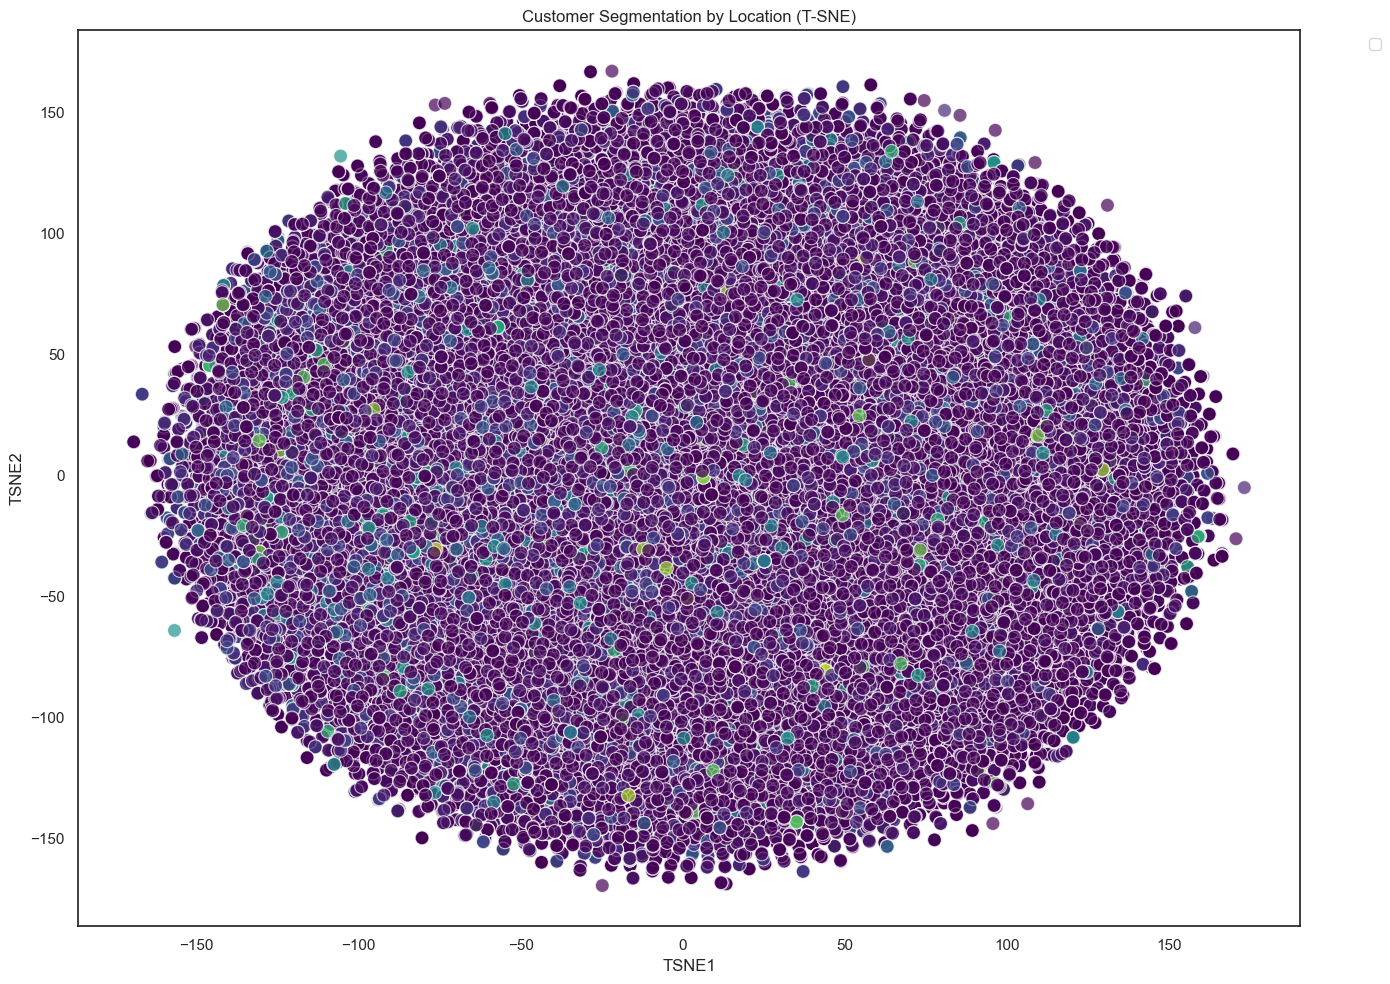

In [35]:
plt.figure(figsize=(14, 10))
sns.scatterplot(
    x='TSNE1', 
    y='TSNE2', 
    hue='CustLocation',
    data=tsne_df,
    palette='viridis',
    alpha=0.7,
    s=100,
    legend=False
)
plt.title('Customer Segmentation by Location (T-SNE)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

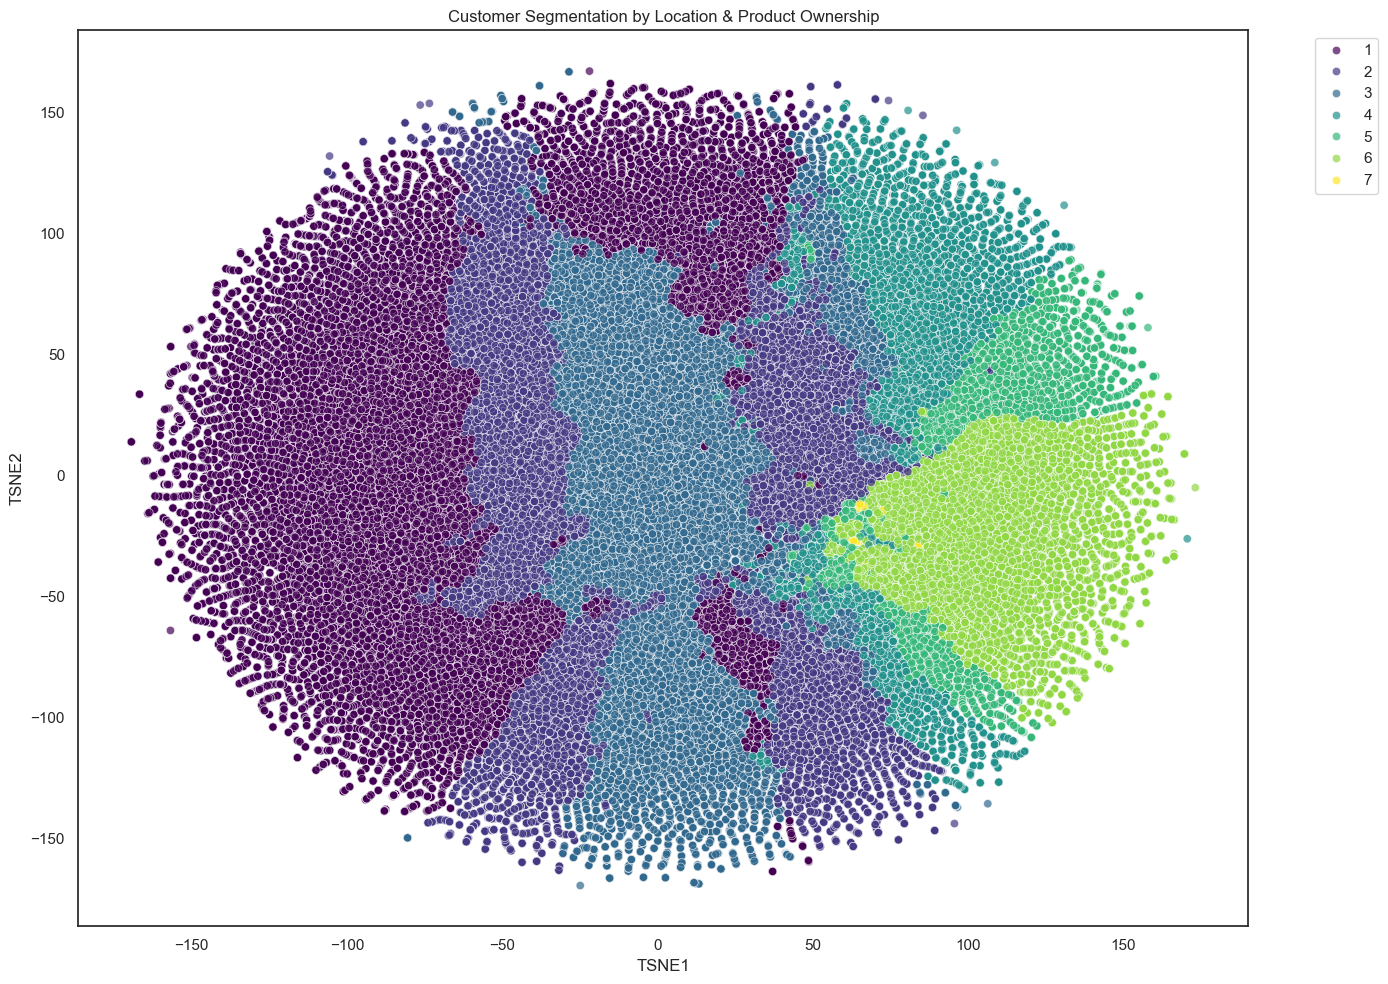

In [37]:
# Create product ownership indicator
final_df['Product_Count'] = final_df[['cds', 'credit card', 'loans', 
                                    'long term investment', 'retirement plan', 
                                    'savings', 'tds']].sum(axis=1)

# Add to T-SNE plot
tsne_df['Product_Count'] = final_df['Product_Count']

plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(
    x='TSNE1', 
    y='TSNE2', 
    hue='Product_Count',
    data=tsne_df,
    palette='viridis',
    alpha=0.7
)
plt.title('Customer Segmentation by Location & Product Ownership')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
final_df

Num_Transactions CustLocation  CustAccountBalance  Gender_F  Gender_M  \
0                      2        Noida           76340.635         1         0   
1                      1       Mumbai           24204.490         0         1   
2                      2       Mumbai          100112.950         1         0   
3                      1       Chāpra             496.180         1         0   
4                      1      Kolkata           87058.650         0         1   
...                  ...          ...                 ...       ...       ...   
881676                 1     Bhiwandi          133067.230         0         1   
881677                 1    Mangalore           96063.460         0         1   
881678                 1       Guntur            5559.750         0         1   
881679                 1      Chennai           35295.920         0         1   
881680                 1    Mussoorie            6968.930         0         1   

        cds  credit card  loans  long term investment  retirement plan  \
0         0            1      0                     0                0   
1         0            1      1                     0                0   
2         0            1      0                     0                0   
3         0            0      1                     0                0   
4         0            0      0                     0                0   
...     ...          ...    ...                   ...              ...   
881676    1            1      0                     0                1   
881677    0            0      0                     0                0   
881678    0            0      1                     0                0   
881679    0            1      0                     0                0   
881680    0            0      1                     0                0   

        savings  tds  CustomerAge  
0             1    0         28.5  
1             1    0         22.0  
2             1    0         28.0  
3             0    0         26.0  
4             1    0         51.0  
...         ...  ...          ...  
881676        1    1         26.0  
881677        1    0         20.0  
881678        1    0         23.0  
881679        1    0         21.0  
881680        1    0         34.0  

[881681 rows x 13 columns]

In [12]:
df_copy3 = final_df.copy()

In [10]:
final_df.drop(columns=['CustLocation'], axis=1, inplace=True)

In [11]:
final_df.drop(columns=['Num_Transactions'], axis=1, inplace=True)

In [12]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881681 entries, 0 to 881680
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CustAccountBalance    881681 non-null  float64
 1   Gender_F              881681 non-null  int64  
 2   Gender_M              881681 non-null  int64  
 3   cds                   881681 non-null  int64  
 4   credit card           881681 non-null  int64  
 5   loans                 881681 non-null  int64  
 6   long term investment  881681 non-null  int64  
 7   retirement plan       881681 non-null  int64  
 8   savings               881681 non-null  int64  
 9   tds                   881681 non-null  int64  
 10  CustomerAge           881681 non-null  float64
dtypes: float64(2), int64(9)
memory usage: 74.0 MB


In [13]:
final_df["CustAccountBalance"].describe()

count    8.816810e+05
mean     1.152481e+05
std      8.016469e+05
min      0.000000e+00
25%      5.607120e+03
50%      1.873894e+04
75%      6.181670e+04
max      1.150355e+08
Name: CustAccountBalance, dtype: float64

In [14]:
# Define the columns to check for outliers
columns_to_check = ['CustAccountBalance']

# Remove outliers using IQR
for column in columns_to_check:
    Q1 = final_df[column].quantile(0.25)  # 25th percentile
    Q3 = final_df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the dataset to remove outliers
    final_df = final_df[(final_df[column] >= lower_bound) & (final_df[column] <= upper_bound)]

In [15]:
final_df["CustAccountBalance"].describe()

count    764801.000000
mean      26717.739083
std       31846.834239
min           0.000000
25%        4438.710000
50%       14002.705000
75%       36531.920000
max      146130.910000
Name: CustAccountBalance, dtype: float64

In [16]:
final_df

CustAccountBalance  Gender_F  Gender_M  cds  credit card  loans  \
0                76340.635         1         0    0            1      0   
1                24204.490         0         1    0            1      1   
2               100112.950         1         0    0            1      0   
3                  496.180         1         0    0            0      1   
4                87058.650         0         1    0            0      0   
...                    ...       ...       ...  ...          ...    ...   
881676          133067.230         0         1    1            1      0   
881677           96063.460         0         1    0            0      0   
881678            5559.750         0         1    0            0      1   
881679           35295.920         0         1    0            1      0   
881680            6968.930         0         1    0            0      1   

        long term investment  retirement plan  savings  tds  CustomerAge  
0                          0                0        1    0         28.5  
1                          0                0        1    0         22.0  
2                          0                0        1    0         28.0  
3                          0                0        0    0         26.0  
4                          0                0        1    0         51.0  
...                      ...              ...      ...  ...          ...  
881676                     0                1        1    1         26.0  
881677                     0                0        1    0         20.0  
881678                     0                0        1    0         23.0  
881679                     0                0        1    0         21.0  
881680                     0                0        1    0         34.0  

[764801 rows x 11 columns]

In [17]:
from sklearn.preprocessing import StandardScaler

# Example: Scaling specific columns
columns_to_scale = ["CustAccountBalance", "CustomerAge"]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the specified columns
final_df[columns_to_scale] = scaler.fit_transform(final_df[columns_to_scale])

In [18]:
final_df

CustAccountBalance  Gender_F  Gender_M  cds  credit card  loans  \
0                 1.558175         1         0    0            1      0   
1                -0.078917         0         1    0            1      1   
2                 2.304633         1         0    0            1      0   
3                -0.823365         1         0    0            0      1   
4                 1.894724         0         1    0            0      0   
...                    ...       ...       ...  ...          ...    ...   
881676            3.339408         0         1    1            1      0   
881677            2.177478         0         1    0            0      0   
881678           -0.664368         0         1    0            0      1   
881679            0.269358         0         1    0            1      0   
881680           -0.620119         0         1    0            0      1   

        long term investment  retirement plan  savings  tds  CustomerAge  
0                          0                0        1    0    -0.143841  
1                          0                0        1    0    -0.938346  
2                          0                0        1    0    -0.204957  
3                          0                0        0    0    -0.449420  
4                          0                0        1    0     2.606370  
...                      ...              ...      ...  ...          ...  
881676                     0                1        1    1    -0.449420  
881677                     0                0        1    0    -1.182809  
881678                     0                0        1    0    -0.816115  
881679                     0                0        1    0    -1.060578  
881680                     0                0        1    0     0.528433  

[764801 rows x 11 columns]

### Now Clustering Metrics to choose the best number of clusters 

In [19]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample


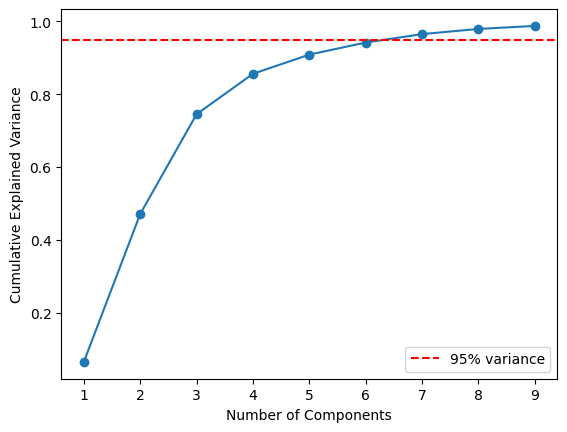

Optimal components: 7


In [24]:
from sklearn.decomposition import TruncatedSVD

# Fit SVD to compute explained variance
svd = TruncatedSVD(n_components=9)  # Max components for your 9 one-hot cols
svd.fit(final_df)

# Calculate cumulative explained variance
explained_variance = svd.explained_variance_ratio_.cumsum()

# Plot
import matplotlib.pyplot as plt
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.show()

# Choose n_components where curve flattens (e.g., at 95% variance)
optimal_components = (explained_variance >= 0.95).argmax() + 1
print(f"Optimal components: {optimal_components}")

In [20]:
from sklearn.decomposition import TruncatedSVD  # For sparse data

# Reduce to 50-100 dimensions
svd = TruncatedSVD(n_components=7)
reduced_data = svd.fit_transform(final_df)

### 1. Inertia/Elbow Method
What it measures:
Sum of squared distances to cluster centers (WSS)

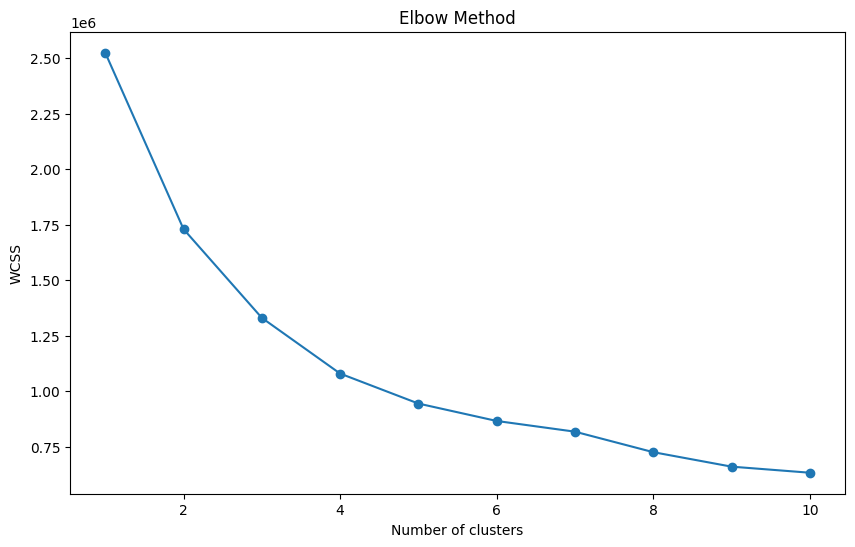

In [26]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(reduced_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### 2. Silhouette Score
What it measures:

Cohesion (how close points are to their cluster center) vs.

Separation (how far apart different clusters are from each other)

In [21]:
sample_size = 50000  # Adjust based on your memory constraints
sample_data = resample(reduced_data, n_samples=sample_size, random_state=42)

For n_clusters = 2, silhouette score is 0.3872225830341098
For n_clusters = 3, silhouette score is 0.37333925552670016
For n_clusters = 4, silhouette score is 0.31537130070403485
For n_clusters = 5, silhouette score is 0.3014372005760008
For n_clusters = 6, silhouette score is 0.3298337100313171
For n_clusters = 7, silhouette score is 0.31164370826454174
For n_clusters = 8, silhouette score is 0.2954001695224049
For n_clusters = 9, silhouette score is 0.30414647510472853
For n_clusters = 10, silhouette score is 0.2976044693015477


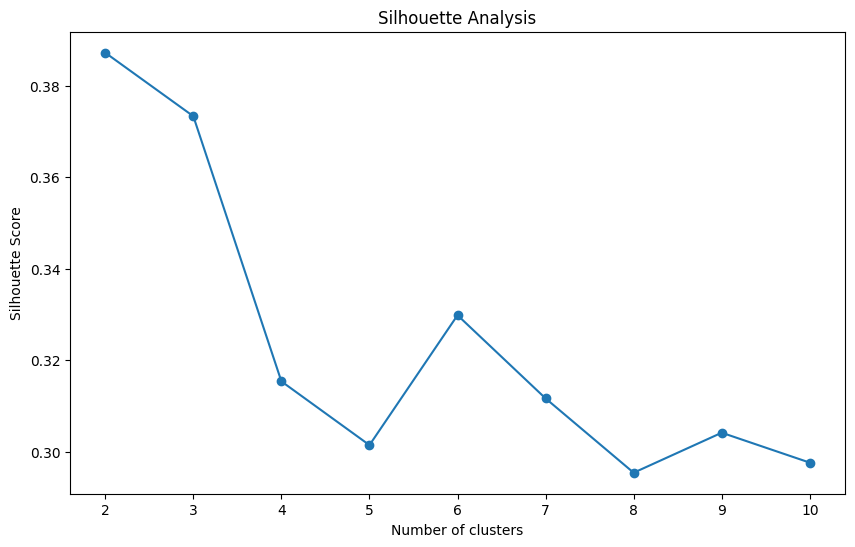

In [28]:
silhouette_scores = []
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    cluster_labels = kmeans.fit_predict(sample_data)
    silhouette_avg = silhouette_score(sample_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_cluster}, silhouette score is {silhouette_avg}")

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

### 3. Calinski-Harabasz Index
What it measures:

Ratio of between-cluster dispersion vs within-cluster dispersion

n_clusters = 2: CH Index = 22726.6
n_clusters = 3: CH Index = 22286.4
n_clusters = 4: CH Index = 20890.8
n_clusters = 5: CH Index = 19137.9
n_clusters = 6: CH Index = 19726.0
n_clusters = 7: CH Index = 18808.2
n_clusters = 8: CH Index = 17267.3
n_clusters = 9: CH Index = 16977.9
n_clusters = 10: CH Index = 16228.9


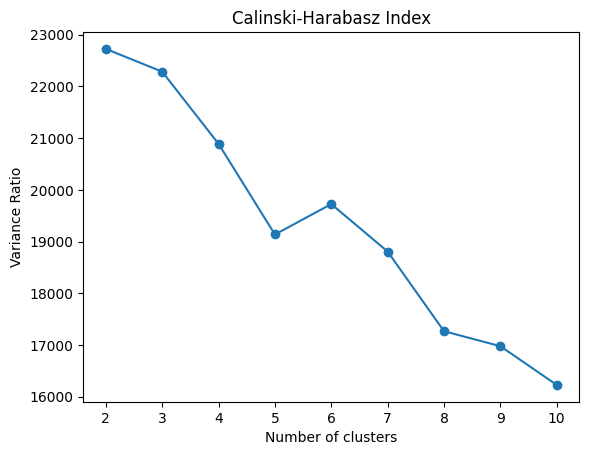

In [29]:
from sklearn.metrics import calinski_harabasz_score

ch_scores = []
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    cluster_labels = kmeans.fit_predict(sample_data)
    ch_score = calinski_harabasz_score(sample_data, cluster_labels)
    ch_scores.append(ch_score)
    print(f"n_clusters = {n_cluster}: CH Index = {ch_score:.1f}")

plt.plot(range(2,11), ch_scores, marker='o')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of clusters')
plt.ylabel('Variance Ratio')
plt.show()

### 4. Davies-Bouldin Index
What it measures:

Average similarity between each cluster and its most similar counterpart

n_clusters = 2: DB Index = 1.306
n_clusters = 3: DB Index = 1.136
n_clusters = 4: DB Index = 1.198
n_clusters = 5: DB Index = 1.245
n_clusters = 6: DB Index = 1.223
n_clusters = 7: DB Index = 1.244
n_clusters = 8: DB Index = 1.170
n_clusters = 9: DB Index = 1.216
n_clusters = 10: DB Index = 1.202


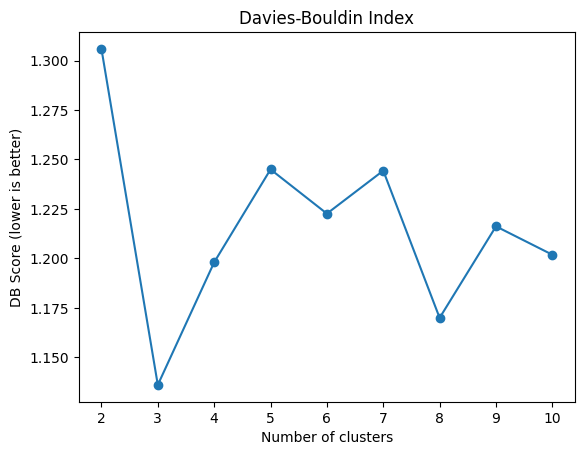

In [30]:
from sklearn.metrics import davies_bouldin_score

db_scores = []
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    cluster_labels = kmeans.fit_predict(sample_data)
    db_score = davies_bouldin_score(sample_data, cluster_labels)
    db_scores.append(db_score)
    print(f"n_clusters = {n_cluster}: DB Index = {db_score:.3f}")

plt.plot(range(2,11), db_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('DB Score (lower is better)')
plt.show()

### Clustering with k-means (number of clusters = 2)

In [22]:
# 1. Apply t-SNE to your data
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(sample_data)

# 2. Create visualization dataframe
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [23]:
# 3. Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(sample_data)

tsne_df['Cluster'] = cluster_labels


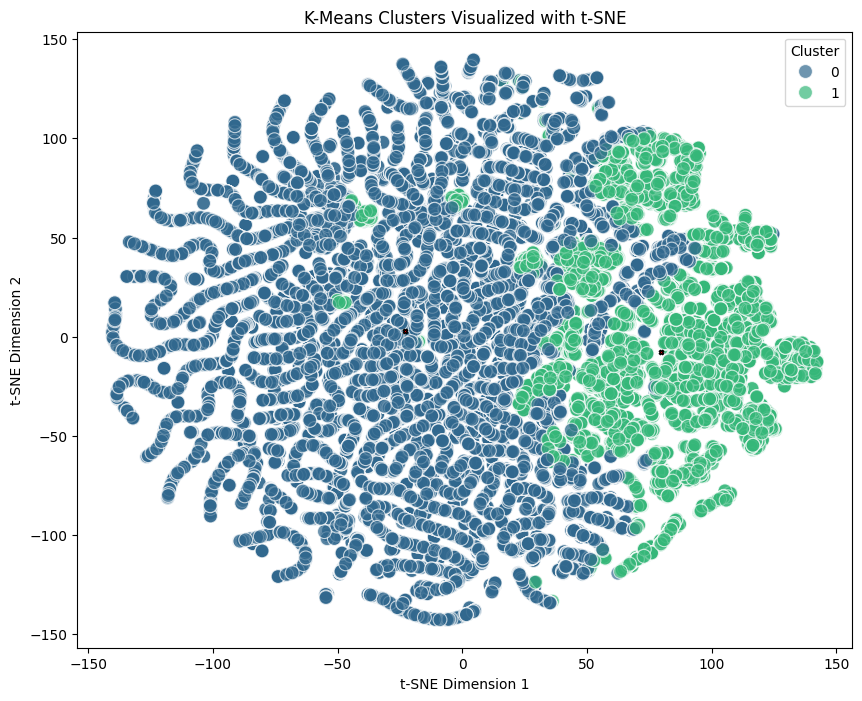

In [24]:
# 4. Create the visualization
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    x='TSNE1', 
    y='TSNE2',
    hue='Cluster',
    palette='viridis',
    data=tsne_df,
    s=100,
    alpha=0.7
)

# 5. Approximate cluster centers in t-SNE space
for cluster in np.unique(cluster_labels):
    # Get median position of points in this cluster
    cluster_mask = (cluster_labels == cluster)
    median_x = np.median(tsne_results[cluster_mask, 0])
    median_y = np.median(tsne_results[cluster_mask, 1])
    
    plt.scatter(
        median_x,
        median_y,
        marker='X',
        s=10,
        c='red',
        edgecolor='black',
        linewidth=1,
        label=f'Cluster {cluster} Center'
    )

plt.title('K-Means Clusters Visualized with t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

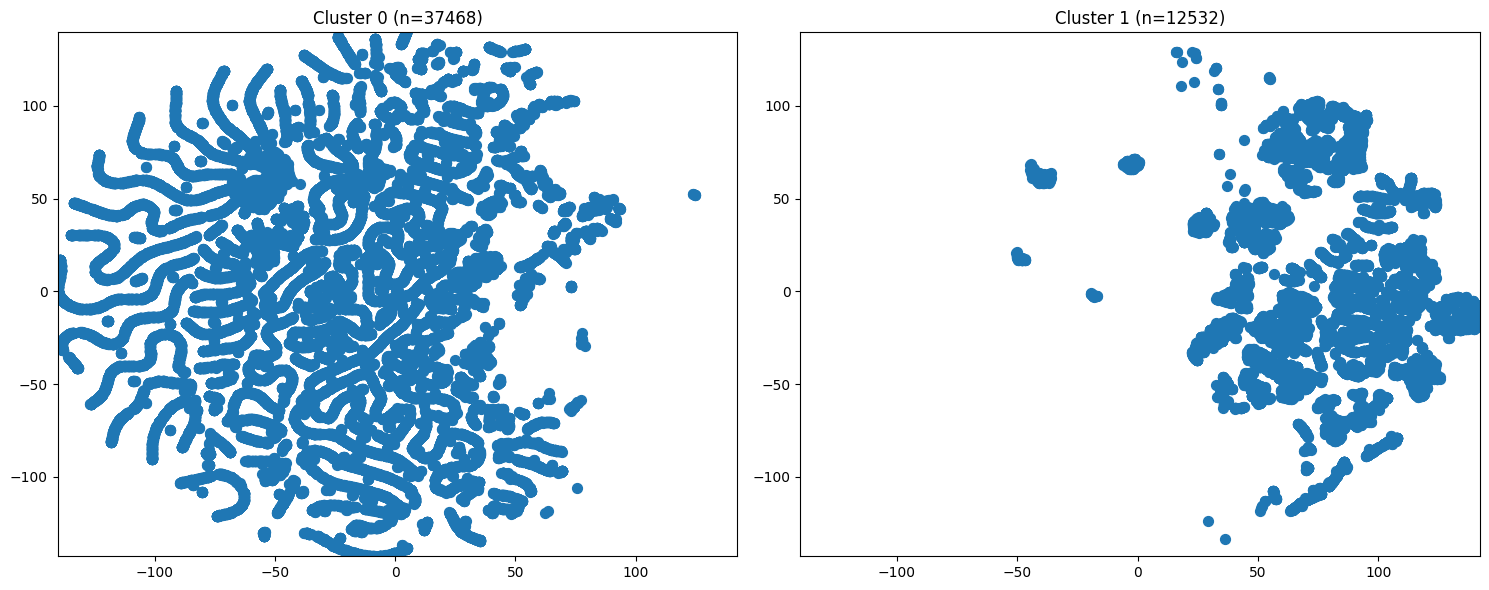

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# Get unique clusters and select only the first 2
unique_clusters = sorted(tsne_df['Cluster'].unique())[:2]

for i, cluster in enumerate(unique_clusters):
    ax = axes[i]  # Indexing for 1D array of axes
    subset = tsne_df[tsne_df['Cluster'] == cluster]
    ax.scatter(subset['TSNE1'], subset['TSNE2'], s=50)
    ax.set_title(f'Cluster {cluster} (n={len(subset)})')
    ax.set_xlim(tsne_df['TSNE1'].min(), tsne_df['TSNE1'].max())
    ax.set_ylim(tsne_df['TSNE2'].min(), tsne_df['TSNE2'].max())

plt.tight_layout()
plt.show()

### DBSCAN

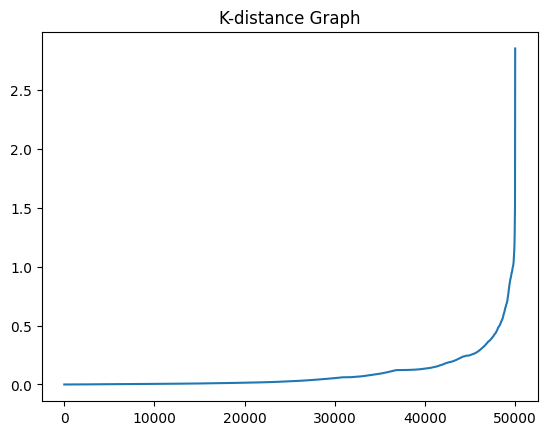

Using epsilon: 0.6775


In [39]:
from sklearn.neighbors import NearestNeighbors
# 1. Determine optimal epsilon for DBSCAN
def find_optimal_epsilon(data, k=20):
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(data)
    distances, _ = nbrs.kneighbors(data)
    distances = np.sort(distances[:, -1], axis=0)
    plt.plot(distances)
    plt.title('K-distance Graph')
    plt.show()
    return distances[-int(0.02*len(distances))]  # Take knee point

eps = find_optimal_epsilon(sample_data)
print(f"Using epsilon: {eps:.4f}")

In [40]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps= 0.6775 , min_samples=20)
cluster_labels = dbscan.fit_predict(sample_data)

# -1 will be noise points automatically
tsne_df['Cluster'] = cluster_labels
print(f"Identified {sum(cluster_labels == -1)} noise points")

Identified 549 noise points


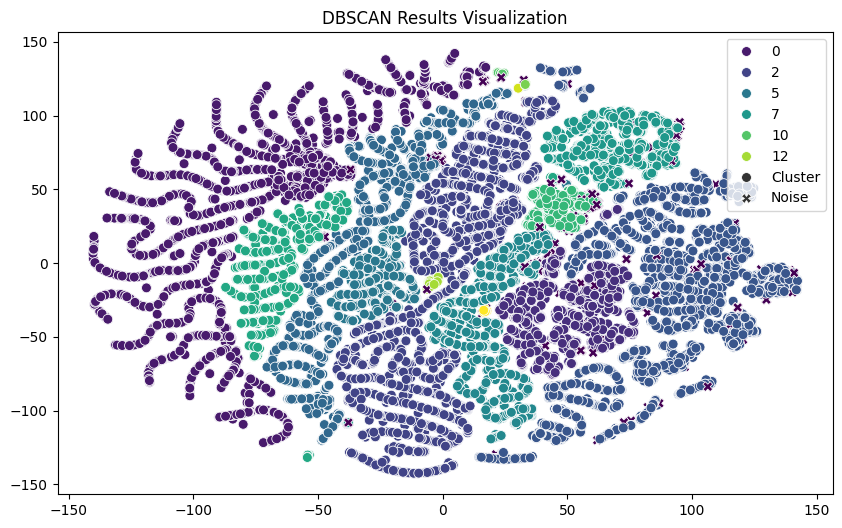

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=cluster_labels, palette='viridis',
    style=np.where(cluster_labels==-1, 'Noise', 'Cluster'),
    s=50
)
plt.title('DBSCAN Results Visualization')
plt.show()

In [42]:
from sklearn.metrics import silhouette_score

# Exclude noise points (-1 labels) for valid calculation
valid_mask = (cluster_labels != -1)
if sum(valid_mask) > 1:  # Need at least 2 samples per cluster
    score = silhouette_score(sample_data[valid_mask], cluster_labels[valid_mask])
    print(f"Silhouette Score (noise excluded): {score:.3f}")
else:
    print("Not enough non-noise points for Silhouette Score")

Silhouette Score (noise excluded): 0.272


### HDBSCAN

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\user\AppData\Local\Temp\ipykernel_14984\3087673541.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


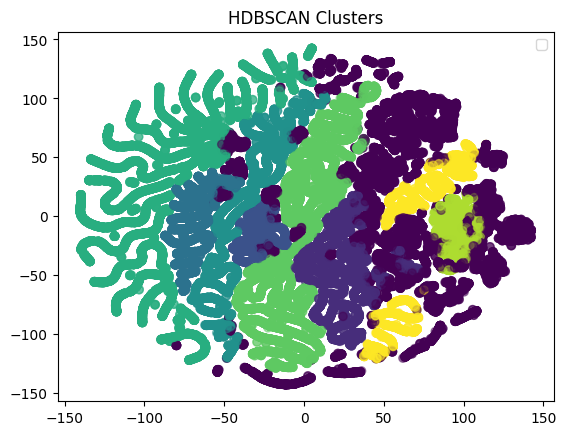

In [43]:
import hdbscan
hdb = hdbscan.HDBSCAN(min_cluster_size=1000,gen_min_span_tree=True)
labels = hdb.fit_predict(sample_data)

# Visualize cluster probabilities
plt.scatter(tsne_results[:,0], tsne_results[:,1], 
            c=labels, cmap='viridis', alpha=0.5)
plt.title('HDBSCAN Clusters')
plt.legend()
plt.show()

In [44]:
import numpy as np

# Count unique cluster labels (excluding noise)
unique_clusters = np.unique(labels)
n_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)

print(f"HDBSCAN found {n_clusters} clusters")
print(f"Cluster labels: {unique_clusters}")
print(f"Noise points: {sum(labels == -1)} ({sum(labels == -1)/len(labels):.1%})")

HDBSCAN found 8 clusters
Cluster labels: [-1  0  1  2  3  4  5  6  7]
Noise points: 13772 (27.5%)


In [45]:
# Merge small clusters (<100 points) into noise
from collections import Counter
counts = Counter(labels)
small_clusters = [k for k,v in counts.items() if v < 100 and k != -1]
labels = np.where(np.isin(labels, small_clusters), -1, labels)

In [ ]:
valid_mask = (labels != -1)
if sum(valid_mask) > 1:
    score = silhouette_score(sample_data[valid_mask], labels[valid_mask])
    print(f"New Silhouette Score: {score:.3f}")  # Aim for >0.3

New Silhouette Score: 0.433


### Hierarchical Clustering

In [48]:
sample_size = 10000  # Adjust based on your memory constraints
sample_data = resample(reduced_data, n_samples=sample_size, random_state=42)

In [50]:
from sklearn.cluster import AgglomerativeClustering
base_hc = AgglomerativeClustering()
base_hc.fit(sample_data)

AgglomerativeClustering()

In [51]:
print("Estimated number of clusters:", set(base_hc.labels_))

Estimated number of clusters: {0, 1}


In [52]:
print("Estimated number of noise points:", list(base_hc.labels_).count(-1))

Estimated number of noise points: 0


In [54]:
print("Silhouette Score:",str(np.round(silhouette_score(sample_data,base_hc.labels_),3)))

Silhouette Score: 0.403


### base_spectral with PCA

In [55]:
sample_size = 10000  # Adjust based on your memory constraints
sample_data = resample(final_df, n_samples=sample_size, random_state=42)

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(sample_data)
pca_components = pd.DataFrame(pca_components,columns=['PC1','PC2'])
pca_components.head()

PC1       PC2
0 -0.900028  0.535971
1  2.973065 -1.392729
2  0.656109 -0.322904
3 -0.310699 -0.402857
4  0.183912 -0.610711

In [58]:
from sklearn.cluster import  SpectralClustering
base_spectral = SpectralClustering(random_state=101)

In [59]:
base_spectral.fit(pca_components)

SpectralClustering(random_state=101)

In [60]:
print("Estimated number of clusters:",len(set(base_spectral.labels_)))
print("Clusters:",set(base_spectral.labels_))

Estimated number of clusters: 8
Clusters: {0, 1, 2, 3, 4, 5, 6, 7}


In [61]:
pca_components['Cluster'] = base_spectral.labels_
print("Silhouette Score:",str(np.round(silhouette_score(pca_components,pca_components.Cluster),3)))

Silhouette Score: 0.69


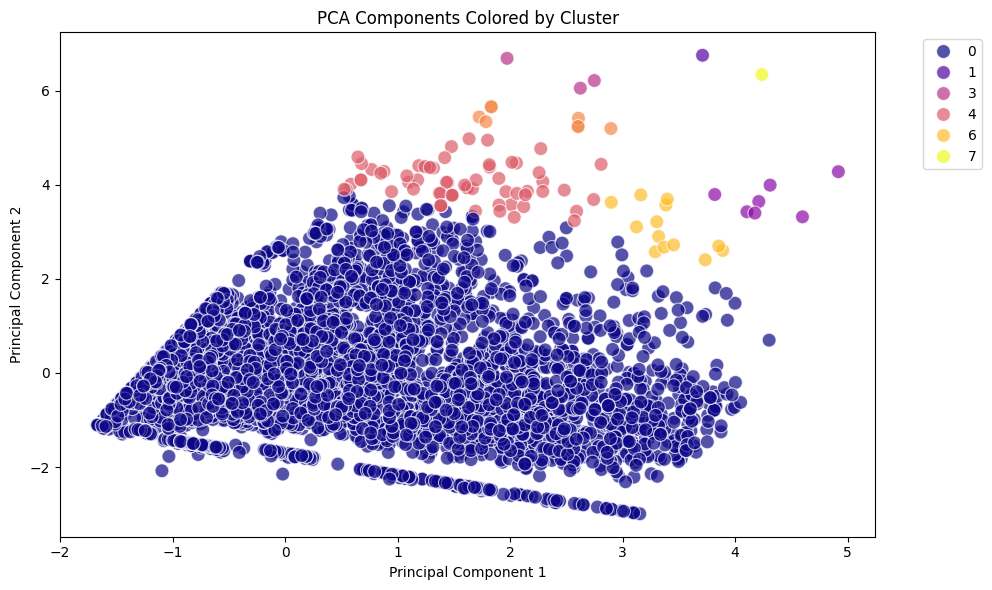

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming pca_components is your DataFrame with columns: PC1, PC2, Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', 
    y='PC2',
    hue='Cluster',
    data=pca_components,
    palette='plasma',
    alpha=0.7,
    s=100
)
plt.title('PCA Components Colored by Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Axes: xlabel='Cluster'>

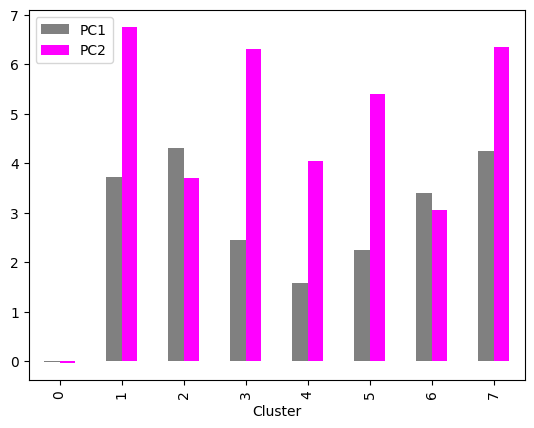

In [63]:
pca_components.groupby('Cluster')[['PC1','PC2']].mean().plot(kind='bar',color=['grey','magenta'])

### base_spectral with Original Features

In [26]:
sample_size = 10000  # Adjust based on your memory constraints
sample_data = resample(final_df, n_samples=sample_size, random_state=42)

In [29]:
base_spectral = SpectralClustering(random_state=101)
base_spectral.fit(sample_data)

SpectralClustering(random_state=101)

In [30]:
print("Estimated number of clusters:",set(base_spectral.labels_))

Estimated number of clusters: {0, 1, 2, 3, 4, 5, 6, 7}


In [31]:
print("Estimated number of noise points:",list(base_spectral.labels_).count(-1))

Estimated number of noise points: 0


In [32]:
print("Silhouette Score:",str(np.round(silhouette_score(sample_data,base_spectral.labels_),3)))

Silhouette Score: 0.393


### Clustering Models Evaluation (Silhouette Scores)

| Model                                 | Number of Clusters | Silhouette Score |
|--------------------------------------|--------------------|------------------|
| K-Means                              | 2                  | 0.387            |
| DBSCAN                               | 6                  | 0.272            |
| HDBSCAN                              | 8                  | 0.433            |
| Hierarchical Clustering              | 2                  | 0.403            |
| Spectral Clustering (with PCA)       | 8                  | **0.690**        |
| Spectral Clustering (Original Features) | 8               | 0.393            |
